**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

Homework notebook

### 학번:  2019

### 이름:  한수호

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [23]:
# Python ≥3.7 is required
import sys
print("Python: ", sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.8.0 is required
import tensorflow as tf
print("TF version: ", tf.__version__)
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# # Where to save the figures
# from pathlib import Path

# IMAGES_PATH = Path() / "images" / "ann"
# IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Python:  sys.version_info(major=3, minor=10, micro=14, releaselevel='final', serial=0)
1.4.2
TF version:  2.16.1


### Exercise 10.1
Define and plot activation functions ELU, leaky ReLU and ReLU6 using keras.activation functions.  
Refer to practice code and copy all the necessary codes


(-2.0, 10.0)

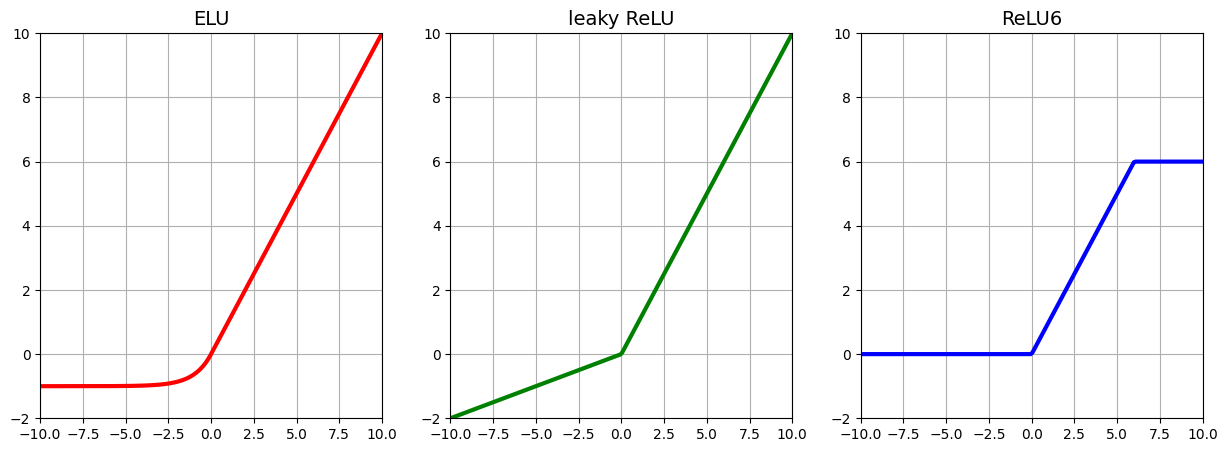

In [24]:
# Exercise 10.1
# Define activation functions using keras.activations
z = np.linspace(-10, 10, 200)


# ELU
elu_ftn = tf.keras.activations.elu

# leaky ReLU
leaky_relu_ftn = tf.nn.leaky_relu

# ReLU6
relu6_ftn = tf.nn.relu6

# Plot
max_z = 5
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(z, elu_ftn(z), "r-", linewidth=3)
plt.title("ELU")
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-2, 10]) 

plt.subplot(132)
plt.plot(z, leaky_relu_ftn(z), "g-", linewidth=3)
plt.title("leaky ReLU")
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-2, 10]) 

plt.subplot(133)
plt.plot(z, relu6_ftn(z), "b-", linewidth=3)
plt.title("ReLU6")
plt.grid(True)
plt.xlim([-10, 10])
plt.ylim([-2, 10]) 

### Exercise 10.2  
Fashion MNIST 실습코드를 이용하여 아래에서 요구하는 hidden layer의 수와 neuron의 수를 갖는 MLP 모델을 구성하고 학습시킨후 training loss와 test accuracy, step당 학습시간, 파라미터의 크기를 비교하시오. 모든 경우 learning curve를 그리시오.
1. (300, 300, 100)
2. (300, 100, 30)
3. (1000, 100)
4. (300, 30)
5. (100, 30)
6. 위의 실습 코드 결과와 함께 결과를 비교하고 분석하시오. 

In [25]:
# Ex10.2
# Preparation codes
from tensorflow import keras
import time

fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid= X_train_full[:-5000] / 255., X_train_full[-5000:] / 255.
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test / 255.

In [26]:
tf.random.set_seed(42)

In [27]:
history = []
results = {'layers':[],'training loss':[], 'test accuracy':[], 'step당 학습시간':[], '파라미터의 크기':[],}
_batch_size = 20000
_epochs = 30

def _create_MLPmodel(i, num_neurons):
    model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28)),
    tf.keras.layers.Flatten()
] + [tf.keras.layers.Dense(neurons, activation="relu") for neurons in num_neurons] +
    [tf.keras.layers.Dense(10, activation="softmax")]
)
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

    model.summary()
    start_time = time.time()
    history.append(model.fit(X_train, y_train, batch_size=_batch_size, epochs=_epochs, validation_data=(X_valid, y_valid)))
    end_time = time.time()
    training_time = end_time - start_time

    print(f"Training time of model {i}: {training_time:.2f} seconds")

    total_params = model.count_params()
    print(f"Total parameters of model {i}: {total_params:,}")
    
    results['layers'].append(num_neurons)
    results['training loss'].append(history[i-1].history['loss'][-1])
    results['test accuracy'].append(history[i-1].history['val_accuracy'][-1])
    results['step당 학습시간'].append(training_time)
    results['파라미터의 크기'].append(total_params)

#### 1. (300, 300, 100)

In [28]:
_create_MLPmodel(1, [300, 300, 100])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,910 (1.36 MB)

 Trainable params: 356,910 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.0700 - loss: 2.3450 - val_accuracy: 0.1292 - val_loss: 2.2847
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1407 - loss: 2.2733 - val_accuracy: 0.1844 - val_loss: 2.2270
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1933 - loss: 2.2198 - val_accuracy: 0.2202 - val_loss: 2.1805
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2320 - loss: 2.1760 - val_accuracy: 0.2612 - val_loss: 2.1407
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2676 - loss: 2.1378 - val_accuracy: 0.2974 - val_loss: 2.1047
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2996 - loss: 2.1028 - val_accuracy: 0.3246 - val_loss: 2.0709
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3274 - loss: 2.0698 - val_accuracy: 0.3610 - val_loss: 2.0386
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3606 - loss: 2.0380 - val_accuracy: 0.3976 - val_loss: 2.0070

KeyboardInterrupt: 

#### 2. (300, 100, 30)

In [ ]:
_create_MLPmodel(2, [300, 100, 30])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,940 (1.03 MB)

 Trainable params: 268,940 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.0832 - loss: 2.2533 - val_accuracy: 0.1082 - val_loss: 2.2182
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1132 - loss: 2.2135 - val_accuracy: 0.1436 - val_loss: 2.1822
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1493 - loss: 2.1789 - val_accuracy: 0.1804 - val_loss: 2.1496
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1882 - loss: 2.1472 - val_accuracy: 0.2210 - val_loss: 2.1189
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2237 - loss: 2.1171 - val_accuracy: 0.2552 - val_loss: 2.0892
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2550 - loss: 2.0880 - val_accuracy: 0.2812 - val_loss: 2.0604
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2794 - loss: 2.0596 - val_accuracy: 0.3008 - val_loss: 2.0322
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3001 - loss: 2.0318 - val_accuracy: 0.3228 - val_loss: 2.0045

#### 3. (1000, 100)

In [ ]:
_create_MLPmodel(3, [1000, 100])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 886,110 (3.38 MB)

 Trainable params: 886,110 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.1335 - loss: 2.2760 - val_accuracy: 0.1732 - val_loss: 2.1969
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2025 - loss: 2.1798 - val_accuracy: 0.2966 - val_loss: 2.1119
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3082 - loss: 2.1001 - val_accuracy: 0.3688 - val_loss: 2.0387
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3730 - loss: 2.0305 - val_accuracy: 0.4210 - val_loss: 1.9747
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4192 - loss: 1.9692 - val_accuracy: 0.4608 - val_loss: 1.9174
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4607 - loss: 1.9139 - val_accuracy: 0.4962 - val_loss: 1.8647
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.4962 - loss: 1.8626 - val_accuracy: 0.5266 - val_loss: 1.8152
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5289 - loss: 1.8142 - val_accuracy: 0.5572 - val_loss:

#### 4. (300, 30)

In [ ]:
_create_MLPmodel(4, [300, 30])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │         9,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,840 (956.41 KB)

 Trainable params: 244,840 (956.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.1052 - loss: 2.4333 - val_accuracy: 0.1162 - val_loss: 2.3261
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1216 - loss: 2.3003 - val_accuracy: 0.1360 - val_loss: 2.2224
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1465 - loss: 2.2057 - val_accuracy: 0.1878 - val_loss: 2.1424
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1950 - loss: 2.1317 - val_accuracy: 0.2486 - val_loss: 2.0759
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2539 - loss: 2.0691 - val_accuracy: 0.3036 - val_loss: 2.0176
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3111 - loss: 2.0140 - val_accuracy: 0.3548 - val_loss: 1.9659
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3582 - loss: 1.9648 - val_accuracy: 0.3980 - val_loss: 1.9196
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3951 - loss: 1.9203 - val_accuracy: 0.4276 - val_loss: 1.8774


#### 5. (100, 30)

In [ ]:
_create_MLPmodel(5, [300, 30])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 30)             │         9,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,840 (956.41 KB)

 Trainable params: 244,840 (956.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.1359 - loss: 2.4167 - val_accuracy: 0.1958 - val_loss: 2.2955
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2147 - loss: 2.2746 - val_accuracy: 0.2388 - val_loss: 2.2129
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2539 - loss: 2.1994 - val_accuracy: 0.2684 - val_loss: 2.1552
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2881 - loss: 2.1454 - val_accuracy: 0.3118 - val_loss: 2.1060
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3269 - loss: 2.0984 - val_accuracy: 0.3542 - val_loss: 2.0599
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3611 - loss: 2.0541 - val_accuracy: 0.3866 - val_loss: 2.0156
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3902 - loss: 2.0114 - val_accuracy: 0.4150 - val_loss: 1.9724
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4141 - loss: 1.9698 - val_accuracy: 0.4390 - val_loss: 1.9304

#### 6  


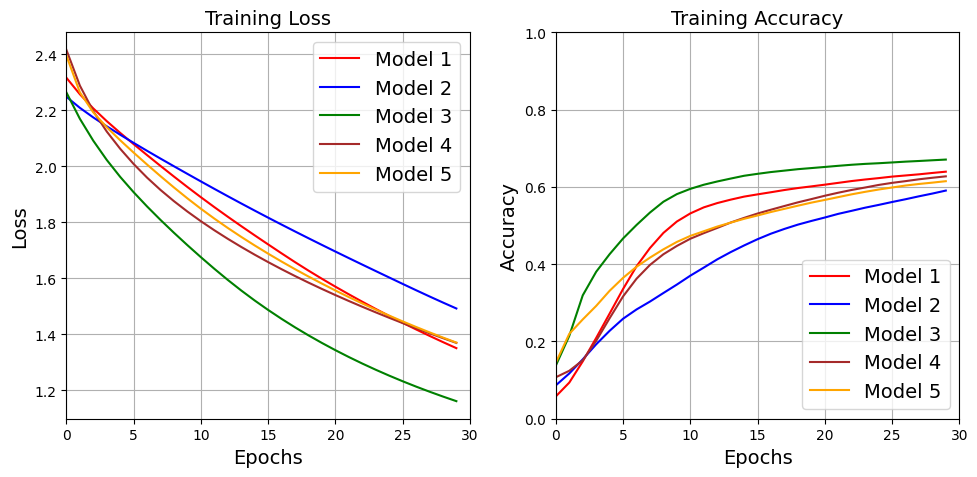

In [ ]:
colors = ["red", "blue", "green", "brown", "orange"]

plt.figure(figsize=(10, 5))

plt.subplot(121)
for idx, hist in enumerate(history):
    plt.plot(hist.history['loss'], label=f'Model {idx + 1}', color=colors[idx])
    plt.title(f'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim([0, 30]) 
    plt.grid(True)
    plt.legend()   
plt.subplot(122)
for idx, hist in enumerate(history):
    plt.plot(hist.history['accuracy'], label=f'Model {idx + 1}', color=colors[idx])
    plt.title(f'Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlim([0, 30]) 
    plt.ylim([0, 1]) 
    plt.grid(True)
    plt.legend()   
    
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display
df = pd.DataFrame(results)
df.index = [f'Model {i+1}' for i in range(len(df))]
pd.options.display.float_format = '{:,.4f}'.format
display(df)

,layers,training loss,test accuracy,step당 학습시간,파라미터의 크기
Model 1,"[300, 300, 100]",1.3508,0.6558,8.4423,356910
Model 2,"[300, 100, 30]",1.4925,0.6046,7.1624,268940
Model 3,"[1000, 100]",1.1615,0.6832,12.7903,886110
Model 4,"[300, 30]",1.3696,0.6400,6.9822,244840
Model 5,"[300, 30]",1.3708,0.6262,6.9510,244840


### Exercise 10.3  

Refer the previous cells. 
Plot the loss curves and obtain mse_test values for the following learning rates and epochs
1) 2e-3, epoch = 5  
2) 2e-3, epoch = 10  
3) 1e-3, epoch = 10  
4) 5e-4, epoch = 10  
5) 5e-4, epoch = 20     
Discuss the results for the above hyperparameters.

In [13]:
# Model definition
from sklearn.metrics import mean_squared_error

history = []
results = {'learning rate':[],'epoch':[], 'training loss':[], 'mse_test':[]}

def _create_MLPmodel_2(i, num_neurons, lr, epoch):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
    model.add(tf.keras.layers.Flatten())
    for j in num_neurons:
        model.add(tf.keras.layers.Dense(j, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])

    model.summary()
    start_time = time.time()
    history.append(model.fit(X_train, y_train, batch_size=_batch_size, epochs=epoch, validation_data=(X_valid, y_valid)))
    end_time = time.time()
    training_time = end_time - start_time

    print(f"Training time of model {i}: {training_time:.2f} seconds")
    
    y_test_pred = model.predict(X_test)
    y_test_encoded = keras.utils.to_categorical(y_test)
    mse_test = mean_squared_error(y_test_encoded, y_test_pred)

    total_params = model.count_params()
    print(f"Total parameters of model {i}: {total_params:,}")
    
    results['learning rate'].append(lr)
    results['epoch'].append(epoch)
    results['training loss'].append(history[i-1].history['loss'][-1])
    results['mse_test'].append(mse_test)

#### 1. 2e-3, epoch = 5

In [14]:
_create_MLPmodel_2(1, [1000,100], 2e-3, 5)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 886,110 (3.38 MB)

 Trainable params: 886,110 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.1736 - loss: 2.2904 - val_accuracy: 0.1764 - val_loss: 2.2679
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.1788 - loss: 2.2642 - val_accuracy: 0.1832 - val_loss: 2.2430
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.1861 - loss: 2.2399 - val_accuracy: 0.1938 - val_loss: 2.2196
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.1975 - loss: 2.2170 - val_accuracy: 0.2092 - val_loss: 2.1974
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.2126 - loss: 2.1954 - val_accuracy: 0.2260 - val_loss: 2.1763
Training time of model 1: 2.54 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
Total parameters of model 1: 886,110


#### 2. 2e-3, epoch=10

In [ ]:
_create_MLPmodel_2(2, [1000,100], 2e-3, 10)

#### 3) 1e-3, epoch = 10  

In [ ]:
_create_MLPmodel_2(3, [1000,100], 1e-3, 10)

#### 4. 5e-4, epoch = 10  

In [ ]:
_create_MLPmodel_2(4, [1000,100], 5e-4, 10)

#### 5. 5e-4, epoch = 20 

In [ ]:
_create_MLPmodel_2(5, [1000,100], 5e-4, 20)

In [ ]:
#6 Discussion
colors = ["red", "blue", "green", "brown", "orange"]

plt.figure(figsize=(10, 5))

for idx, hist in enumerate(history):
    plt.plot(hist.history['loss'], label=f'Model {idx + 1}', color=colors[idx])
    plt.title(f'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim([0, 20]) 
    plt.grid(True)
    plt.legend()   

    
plt.tight_layout()
plt.show()

In [ ]:
df_history = pd.DataFrame(columns=['Model', 'Final Training Loss'])

rows = []
for idx, hist in enumerate(history):
    final_loss = hist.history['loss'][-1]
    model_label = f"Model {idx + 1}"
    rows.append({'Model': model_label, 'Final Training Loss': final_loss})
    
df_history = pd.concat([df_history, pd.DataFrame(rows)], ignore_index=True)

display(df_history)


In [ ]:
import pandas as pd
from IPython.display import display
df = pd.DataFrame(results)
df.index = [f'Model {i+1}' for i in range(len(df))]
pd.options.display.float_format = '{:,.4f}'.format
display(df)

### Exercise 10.4
아래의 파라미터를 갖는 fully-connected network에 대해 다음 물음에 답하시오  
Number of input features: Nf  
Number of neurons in ith hidden nodes: Nni  
Number of hidden layers: Nh  
Number of output node: No  

1. MAC(multiply and addition) operation의 수를 위에서 주어진 파라미터를 이용하여 식으로 표현하시오. 단, Nh=3이다.  
2. 위의 california housing dataset에 대해 Nh=3, Nn1=Nn2=Nn3=30일 때 30 epoch 동안 학습후 loss, val_loss, mse_test값을 구하시오. Hyperparameter는 Regression MLP의 실습 코드와 같은 값을 이용한다. Tensorboard를 위해 log10 directory에 get_log_dir 함수를 이용하여 subdirectory를 생성하시오.  
3. Nh=2일 때 MAC operation 수가 최대한 비슷하도록 Nn1=Nn2를 구하고 2와 같은 조건으로 학습시키고 loss, val_loss, mse_test값을 구하시오.
4. Nh=1일 때 MAC operation 수가 최대한 비슷하도록 Nn1을 구하고 2와 같은 조건으로 학습시키고 loss, val_loss, mse_test값을 구하시오.  
5. 2-4번의 결과를 비교하고 분석하시오. 또한 Tensorboard에서 learning curve를 비교하시오.

#### 1. Number of MAC operations   
Answer: 
$MAC=(N_{n1}×Nf)+(N_{n1}×N_{n2})+(N_{n2}×N_{n3})+(N_{n3}×No)$

In [29]:
import os
import time

def get_log_dir():
    root_logdir = os.path.join(os.curdir, "log10")
    subdir = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, subdir)

In [30]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [35]:
history = []
results = {'layers':[], 'loss':[], 'val_loss':[], 'mse_test':[]}

def _MLP_Model(i, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons[0], activation='relu', input_shape=X_train.shape[1:]))
    for neurons in num_neurons[1:]:
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

    model.compile(loss='mean_squared_error', optimizer=optimizer)

    log_dir = get_log_dir()
    tensorboard_cb = TensorBoard(log_dir=log_dir)

    history.append(model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid),callbacks=[tensorboard_cb]))

    mse_test = model.evaluate(X_test, y_test)

    y_pred = model.predict(X_valid)
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_valid)))
    
    results['layers'].append(num_neurons)
    results['loss'].append(history[i-1].history['loss'][-1])
    results['val_loss'].append(history[i-1].history['val_loss'][-1])
    results['mse_test'].append(mse_test)

#### 2.Nh=3

In [36]:
_MLP_Model(1, [30,30,30])

Epoch 1/30
  1/363 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - loss: 5.6509

/home/suhohan/anaconda3/envs/ann/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1113 - val_loss: 0.6597
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.4699 - val_loss: 0.6253
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.4103 - val_loss: 0.7432
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.3901 - val_loss: 0.5802
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.3746 - val_loss: 0.5005
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.3659 - val_loss: 0.6258
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.3610 - val_loss: 0.4742
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.3556 - val_loss: 0.4434
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 0.3499 - val_loss: 0.3286
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.3452 - val_loss: 0.3494
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.3417 - val_loss: 0.3391
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s

#### 3. Nh=2

In [37]:
#3
# number of MAC operation for 3 hidden layers : 
# 8 x 30 + 30 x 30 + 30 x 30 + 30 x 1 = 2070
# number of MAC operation for 2 hidden layers : 
# 8 x n + n x n  + n x 1 = 2070 -> n = 41
_MLP_Model(2, [41, 41])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - loss: 1.0960 - val_loss: 0.5878
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.4680 - val_loss: 0.9268
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.4167 - val_loss: 0.4239
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.3962 - val_loss: 0.5015
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.3828 - val_loss: 0.3498
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.3749 - val_loss: 0.3834
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.3675 - val_loss: 0.3527
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.3624 - val_loss: 0.3577
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.3582 - val_loss: 0.3331
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.3542 - val_loss: 0.3532
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.3509 - val_loss: 0.3525
Epoch 12/30
363/363 ━━━━━━━━━━

#### 4. Nh=1

In [38]:
#4
# number of MAC operation for 1 hidden layers : 
# 8 x n + n x 1 = 2070 -> n = 230
_MLP_Model(3, [230])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 1.1270 - val_loss: 0.5225
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.4793 - val_loss: 0.3912
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.4343 - val_loss: 4.9113
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.4200 - val_loss: 6.6173
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.4290 - val_loss: 15.6104
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.4395 - val_loss: 19.7718
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.4593 - val_loss: 0.4159
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4000 - val_loss: 0.3458
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.3865 - val_loss: 0.3711
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.3786 - val_loss: 0.3489
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.3728 - val_loss: 0.3462
Epoch 12/30
363/363 ━━━━━━━━

#### 5. 분석

In [41]:
import pandas as pd
from IPython.display import display
df = pd.DataFrame(results)
df.index = [f'Model {i+1}' for i in range(len(df))]
pd.options.display.float_format = '{:,.4f}'.format
display(df)

,layers,loss,val_loss,mse_test
Model 1,"[30, 30, 30]",0.2934,0.3017,0.3127
Model 2,"[41, 41]",0.3173,1.0912,0.3277
Model 3,[230],0.3231,0.3619,0.3242
